# K Means Clustering

## Kmeans Explanation

Mathematically, Kmeans is an optimization problem. We are trying to minimize the distance between the points in a cluster and the centroid of the cluster. The distance metric is usually Euclidean distance. The centroid is the mean of the points in the cluster. The algorithm is as follows:

1. Initialize the centroids. This can be done by randomly selecting k points from the dataset or by using some other heuristic.

2. Assign each point to the closest centroid. This is called the assignment step.

3. Recompute the centroids using the points assigned to them. This is called the update step.

4. Repeat steps 2 and 3 until the centroids don't change.



In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [41]:
X,y = make_blobs(n_samples=500,centers=3, cluster_std=0.8) 

In [52]:
y

array([2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2,
       1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2,

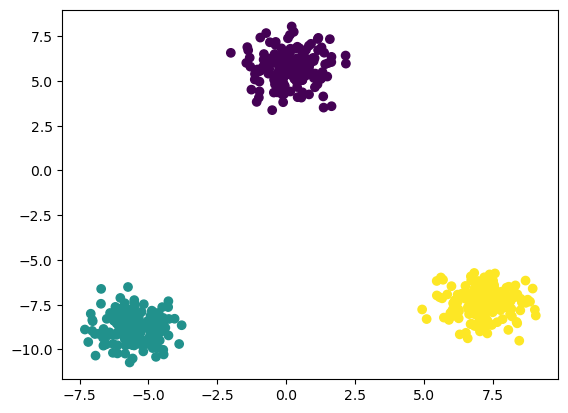

In [42]:
plt.scatter(X[:,0],X[:,1],c=y)

In [43]:
X.shape # 500 samples, 2 features

(500, 2)

In [44]:
r = np.random.permutation(np.arange(X.shape[0])) # random permutation of 500 numbers
r

array([119, 286, 496, 477, 169, 199,  80,  41,   3, 145,   8, 368, 152,
       300, 131,  55, 409, 143, 111, 233, 476, 278, 229, 411, 474, 265,
       249, 336, 281, 148, 198, 431, 266, 291, 394, 326, 122, 298, 246,
       211, 323, 137,  63,   0, 360,  13, 433, 215, 386, 117, 484, 388,
       254, 453, 213, 457, 352, 167, 442, 258, 399, 420, 309, 432, 463,
       397, 221, 465,  45,  28, 348, 208, 473, 192,  10, 142, 479, 475,
       202, 467,  24, 149, 260, 354, 319, 349, 263, 257,  29, 340, 487,
       224, 320, 107,  72, 239,   2, 123, 317,  11, 132, 378, 214, 262,
       430, 366, 377,  84, 444, 114,  50, 455, 446, 158, 333,  42, 112,
       273, 290, 325, 447, 297, 159, 499, 498, 174, 196, 155, 146, 255,
       220, 212, 376, 370, 342, 384, 412, 371, 116, 351, 305, 410, 261,
       328, 154,  20,  65, 321,  79,  47, 414, 289,   5, 452, 247, 166,
       385, 268, 133, 182,  32,  26, 492, 170, 456, 237, 374,  12, 413,
        93, 236, 440, 380, 156, 493,  15, 217, 375, 472, 165, 46

In [45]:
r[0]

119

In [46]:
M1 = X[r[0], :]
M2 = X[r[1], :]
M3 = X[r[2], :]
M1, M2, M3

(array([-4.65252562, -9.17005728]),
 array([0.06814692, 7.38190224]),
 array([-4.79408331, -9.54338428]))

In [47]:
def make_groups(X, f1, f2, f3): # X is the data, f1, f2, f3 are the features
    d1 = ((X-f1)**2).sum(axis=1) # distance from feature 1
    d2 = ((X-f2)**2).sum(axis=1) # distance from feature 2
    d3 = ((X-f3)**2).sum(axis=1) # distance from feature 3
    D = np.hstack((d1[:, np.newaxis], d2[:, np.newaxis], d3[:, np.newaxis])) # stack the distances
    groups = np.argmin(D, axis=1)
    return groups


In [48]:
y = make_groups(X, M1, M2, M3)
np.unique(y)

array([0, 1, 2])

In [49]:
idx = y == 0
M1 = X[idx, :].mean(axis=0)
M2 = X[y == 1, :].mean(axis=0)
M3 = X[y == 2, :].mean(axis=0)

In [51]:
y

array([2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2,
       1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2,

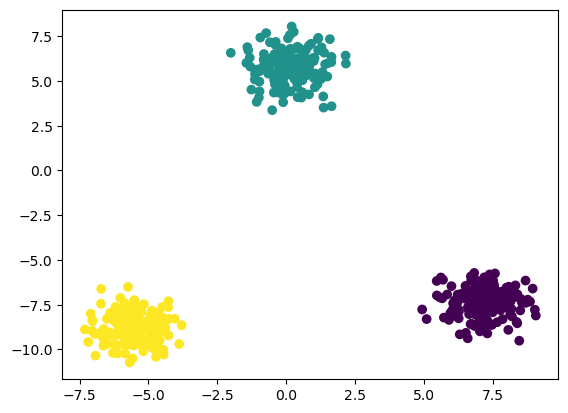

In [50]:
y = make_groups(X, M1, M2, M3)
plt.scatter(X[:,0],X[:,1],c=y)

/home/pcmoraes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


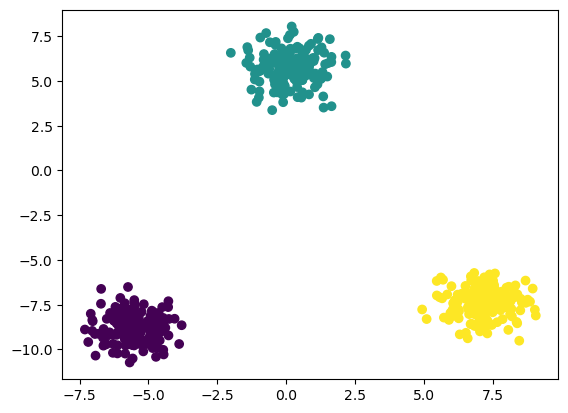

In [57]:
model = KMeans(n_clusters=3)
model.fit(X)
y_predict = model.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_predict)

Text(0.5, 1.0, 'Implementation')

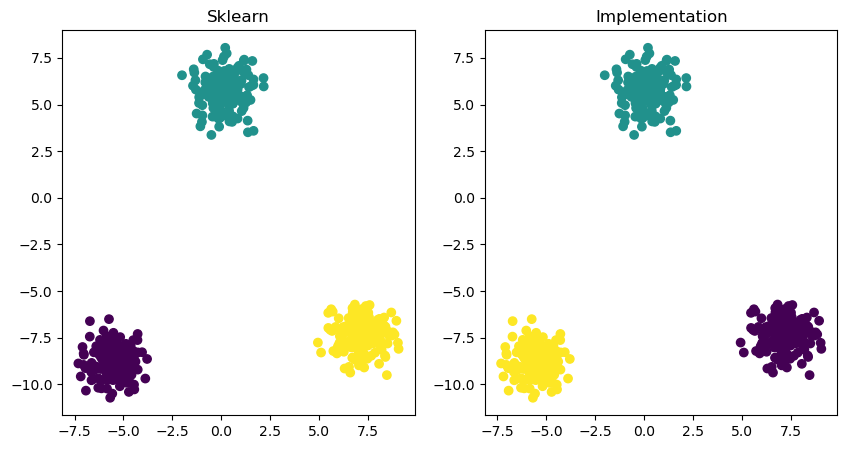

In [58]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X[:,0],X[:,1],c=y_predict)
ax[0].set_title('Sklearn')
ax[1].scatter(X[:,0],X[:,1],c=y)
ax[1].set_title('Implementation')
